In [4]:
from pgmpy.factors.continuous import ContinuousFactor
from pgmpy.models import BayesianNetwork

class BayesianNetworkModel:
    def __init__(self, variables):
        self.variables = variables
        self.network = BayesianNetwork()

    def initialize(self):
        self.build_network_structure()
        self.add_cpds()

    def build_network_structure(self):
        # Logic for building the network structure based on the variable relationships
        for variable in self.variables:
            # Add the variable nodes to the Bayesian network
            self.network.add_node(variable['name'])
            if 'parents' in variable:
                for parent in variable['parents']:
                    self.network.add_edge(parent['name'], variable['name'])

    def add_cpds(self):
        # Here we will create ContinuousFactors for continuous variables
        for variable in self.variables:
            # Create CPD for continuous variables
            if variable['type'] == 'continuous':
                cpd = self.build_continuous_cpd(variable)
                self.network.add_cpds(cpd)

        self.network.check_model()

    def build_continuous_cpd(self, variable):
        # Create a ContinuousFactor for continuous variable
        parents = variable.get('parents', [])
        parent_names = [parent['name'] for parent in parents]
        
        # Assume that we're using a simple linear or exponential relationship
        # Example: You can use a more complex function depending on your relationship type
        relationship_type = 'linear'  # Default relationship type (can be adjusted as needed)
        
        if relationship_type == 'linear':
            # Define the mean and std_dev for the Gaussian distribution
            mean = variable['parameters']['mean']
            std_dev = variable['parameters']['std_dev']
            
            # Create the factor for the continuous distribution
            cpd = ContinuousFactor(
                [variable['name']],
                parent_names,
                [mean, std_dev]  # Simple params for a Gaussian distribution (mean, std_dev)
            )
        
        # If you have other relationship types (e.g., exponential), you can define those here.
        elif relationship_type == 'exponential':
            # Define exponential CPD or other distribution types here
            pass  # Implement as needed
        
        return cpd

# Example usage
variables = [
    {
        'name': 'faculty_hours',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 40, 'std_dev': 3}
    },
    {
        'name': 'faculty_satisfaction',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 60, 'std_dev': 10},
        'parents': [{'name': 'faculty_hours', 'relationship_type': 'exponential', 'coefficients': {'a': 60, 'b': -0.02}}]
    },
    {
        'name': 'student_satisfaction',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 70, 'std_dev': 15},
        'parents': [
            {'name': 'faculty_hours', 'relationship_type': 'linear', 'coefficients': {'intercept': 50, 'slope': -0.5}},
            {'name': 'faculty_satisfaction', 'relationship_type': 'linear', 'coefficients': {'intercept': 70, 'slope': 0.3}}
        ]
    },
    # Add more variables as needed...
]

# Initialize and build the Bayesian network
network_model = BayesianNetworkModel(variables)
network_model.initialize()

ValueError: pdf: Expected type: str or function, Got: <class 'list'>

In [5]:
from scipy.stats import norm

In [7]:
norm.pdf(loc=40, scale=3)

TypeError: pdf() missing 1 required positional argument: 'x'

In [ ]:
ContinuousFactor??

In [12]:
from pgmpy.factors.continuous import ContinuousFactor
from pgmpy.models import BayesianNetwork
import numpy as np

class BayesianNetworkModel:
    def __init__(self, variables):
        self.variables = variables
        self.network = BayesianNetwork()

    def initialize(self):
        self.build_network_structure()
        self.add_cpds()

    def build_network_structure(self):
        # Logic for building the network structure based on the variable relationships
        for variable in self.variables:
            self.network.add_node(variable['name'])
            if 'parents' in variable:
                for parent in variable['parents']:
                    self.network.add_edge(parent['name'], variable['name'])

    def add_cpds(self):
        for variable in self.variables:
            if variable['type'] == 'continuous':
                cpd = self.build_continuous_cpd(variable)
                self.network.add_cpds(cpd)
        self.network.check_model()

    def build_continuous_cpd(self, variable):
        # Get parent names for the ContinuousFactor
        parents = variable.get('parents', [])
        parent_names = [parent['name'] for parent in parents]
        
        # Custom PDF function for this variable based on the linear relationship
        def custom_pdf(*args):
            # The input order is parent values followed by the current node value
            parent_values = args[:-1]
            node_value = args[-1]

            # Calculate expected mean based on the relationship type and coefficients
            mean = variable['parameters']['mean']
            if parents:
                for i, parent in enumerate(parents):
                    coeffs = parent['coefficients']
                    if parent['relationship_type'] == 'linear':
                        mean += coeffs['intercept'] + coeffs['slope'] * parent_values[i]
                    elif parent['relationship_type'] == 'exponential':
                        a, b = coeffs['a'], coeffs['b']
                        mean += a * np.exp(b * parent_values[i])

            # Define standard deviation
            std_dev = variable['parameters']['std_dev']

            # Return Gaussian probability density value
            return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((node_value - mean) / std_dev) ** 2)

        # Create ContinuousFactor with custom PDF
        return ContinuousFactor([variable['name']], "normal")

# Example variables with dependencies
variables = [
    {
        'name': 'faculty_hours',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 40, 'std_dev': 3}
    },
    {
        'name': 'faculty_satisfaction',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 60, 'std_dev': 10},
        'parents': [{'name': 'faculty_hours', 'relationship_type': 'exponential', 'coefficients': {'a': 60, 'b': -0.02}}]
    },
    {
        'name': 'student_satisfaction',
        'type': 'continuous',
        'distribution': 'Gaussian',
        'parameters': {'mean': 70, 'std_dev': 15},
        'parents': [
            {'name': 'faculty_hours', 'relationship_type': 'linear', 'coefficients': {'intercept': 50, 'slope': -0.5}},
            {'name': 'faculty_satisfaction', 'relationship_type': 'linear', 'coefficients': {'intercept': 70, 'slope': 0.3}}
        ]
    },
]

# Initialize and build the Bayesian network
network_model = BayesianNetworkModel(variables)
network_model.initialize()


NotImplementedError: normal distribution not supported. Please use CustomDistribution

In [30]:
import yaml
from pgmpy.factors.continuous import ContinuousFactor
from pgmpy.models import BayesianNetwork
from scipy.stats import multivariate_normal

class BayesianNetworkModel:
    def __init__(self, variables, covariance_matrix):
        self.variables = variables
        self.covariance_matrix = covariance_matrix
        self.network = BayesianNetwork()
        self.build_network()

    def build_network(self):
        # Create nodes and edges based on the covariance matrix relationships
        for var in self.variables:
            self.network.add_node(var['name'])
        for i, var1 in enumerate(self.variables):
            for j, var2 in enumerate(self.variables):
                if i < j and self.covariance_matrix[i][j] != 0:
                    self.network.add_edge(var1['name'], var2['name'])

    def add_cpds(self):
        # Add ContinuousFactor for each variable based on the covariance matrix
        mean_vector = [var['parameters']['mean'] for var in self.variables]
        cov_matrix = self.covariance_matrix
        cpd = ContinuousFactor(
                variables=[var['name'] for var in self.variables],
                pdf=lambda x: multivariate_normal.pdf(x, mean=mean_vector, cov=cov_matrix)
            )
        self.network.add_cpds(cpd)

In [36]:
# Load YAML configuration and initialize Bayesian Network
with open('config-test.yaml') as file:
    config = yaml.safe_load(file)

variables = config['variables']
covariance_matrix = config['covariance_matrix']

In [47]:
network_model = BayesianNetworkModel(variables, covariance_matrix)
network_model.add_cpds()
network_model.build_network()

In [48]:
network_model.network.check_model()

ValueError: CPD associated with faculty_hours doesn't have proper parents associated with it.

In [35]:
network_model.network.adj

AdjacencyView({'faculty_hours': {'faculty_satisfaction': {'weight': None}, 'student_satisfaction': {'weight': None}, 'research_output': {'weight': None}, 'funding': {'weight': None}, 'teaching_quality': {'weight': None}, 'faculty_research_hours': {'weight': None}, 'student_performance': {'weight': None}, 'collaboration_index': {'weight': None}, 'department_reputation': {'weight': None}}, 'faculty_satisfaction': {'student_satisfaction': {'weight': None}, 'research_output': {'weight': None}, 'funding': {'weight': None}, 'teaching_quality': {'weight': None}, 'faculty_research_hours': {'weight': None}, 'student_performance': {'weight': None}, 'collaboration_index': {'weight': None}, 'department_reputation': {'weight': None}}, 'student_satisfaction': {'research_output': {'weight': None}, 'funding': {'weight': None}, 'teaching_quality': {'weight': None}, 'faculty_research_hours': {'weight': None}, 'student_performance': {'weight': None}, 'collaboration_index': {'weight': None}, 'department_r

In [50]:
from pgmpy.models import BayesianModel
bet = BayesianNetwork()

In [51]:
bet.add_cpds??

Signature: bet.add_cpds(*cpds)
Source:   
    def add_cpds(self, *cpds):
        """
        Add CPD (Conditional Probability Distribution) to the Bayesian Model.

        Parameters
        ----------
        cpds  :  list, set, tuple (array-like)
            List of CPDs which will be associated with the model

        Examples
        --------
        >>> from pgmpy.models import BayesianNetwork
        >>> from pgmpy.factors.discrete.CPD import TabularCPD
        >>> student = BayesianNetwork([('diff', 'grades'), ('aptitude', 'grades')])
        >>> grades_cpd = TabularCPD('grades', 3, [[0.1,0.1,0.1,0.1,0.1,0.1],
        ...                                       [0.1,0.1,0.1,0.1,0.1,0.1],
        ...                                       [0.8,0.8,0.8,0.8,0.8,0.8]],
        ...                         evidence=['diff', 'aptitude'], evidence_card=[2, 3],
        ...                         state_names={'grades': ['gradeA', 'gradeB', 'gradeC'],
        ...                             

In [61]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.continuous import ContinuousFactor
from scipy.stats import norm

# Step 1: Define the Bayesian Network Structure
digital_twin = BayesianNetwork([('faculty_hours', 'faculty_satisfaction'),
                                ('faculty_hours', 'student_satisfaction'),
                                ('faculty_satisfaction', 'student_satisfaction')])

# Step 2: Define Continuous Relationships with ContinuousFactor

# Define PDF functions for each factor (e.g., Gaussian PDFs with given means and standard deviations).
faculty_hours_pdf = lambda x: norm.pdf(x, loc=40, scale=3)  # Mean of 40 hours, std dev of 3
faculty_satisfaction_pdf = lambda x, fh: norm.pdf(x, loc=60 - 0.2 * fh, scale=10)  # Mean decreases as faculty_hours increases
student_satisfaction_pdf = lambda x, fh, fs: norm.pdf(x, loc=70 - 0.5 * fh + 0.3 * fs, scale=15)  # Influenced by both faculty_hours and faculty_satisfaction

# Step 3: Create ContinuousFactor for each variable
faculty_hours_factor = ContinuousFactor(variables=['faculty_hours'], pdf=faculty_hours_pdf)
faculty_satisfaction_factor = ContinuousFactor(variables=['faculty_satisfaction', 'faculty_hours'], pdf=faculty_satisfaction_pdf)
student_satisfaction_factor = ContinuousFactor(variables=['student_satisfaction', 'faculty_hours', 'faculty_satisfaction'], pdf=student_satisfaction_pdf)

# Step 4: Add the factors to the Bayesian Network
digital_twin.add_cpds(faculty_hours_factor, faculty_satisfaction_factor, student_satisfaction_factor)

# Step 5: Check if the model is valid
#digital_twin.check_model()

print("Digital twin Bayesian network created successfully with ContinuousFactors.")

Digital twin Bayesian network created successfully with ContinuousFactors.


In [62]:
import numpy as np
import pandas as pd

# Simulate samples based on relationships defined in ContinuousFactors
def simulate_samples(num_samples=1000):
    samples = []
    for _ in range(num_samples):
        # Sample faculty_hours from a Gaussian distribution
        faculty_hours = np.random.normal(loc=40, scale=3)
        
        # Sample faculty_satisfaction conditioned on faculty_hours
        faculty_satisfaction_mean = 60 - 0.2 * faculty_hours
        faculty_satisfaction = np.random.normal(loc=faculty_satisfaction_mean, scale=10)
        
        # Sample student_satisfaction conditioned on faculty_hours and faculty_satisfaction
        student_satisfaction_mean = 70 - 0.5 * faculty_hours + 0.3 * faculty_satisfaction
        student_satisfaction = np.random.normal(loc=student_satisfaction_mean, scale=15)
        
        samples.append({
            'faculty_hours': faculty_hours,
            'faculty_satisfaction': faculty_satisfaction,
            'student_satisfaction': student_satisfaction
        })
        
    return pd.DataFrame(samples)

# Generate samples
sampled_data = simulate_samples()
print("Sampled Data:\n", sampled_data.head())

Sampled Data:
    faculty_hours  faculty_satisfaction  student_satisfaction
0      38.647718             51.065331             80.362758
1      47.204879             26.684120             45.475036
2      39.026736             45.965203             74.597174
3      39.233782             40.598770             66.015988
4      34.466359             57.674153             77.037164


In [63]:
# Filter samples for scenarios with high faculty hours
high_hours_data = sampled_data[sampled_data['faculty_hours'] > 45]

# Calculate mean and variance in student satisfaction for high faculty hours
mean_student_satisfaction_high_hours = high_hours_data['student_satisfaction'].mean()
variance_student_satisfaction_high_hours = high_hours_data['student_satisfaction'].var()

print("Mean student satisfaction with high faculty hours (>45):", mean_student_satisfaction_high_hours)
print("Variance in student satisfaction with high faculty hours (>45):", variance_student_satisfaction_high_hours)

Mean student satisfaction with high faculty hours (>45): 62.496056182284214
Variance in student satisfaction with high faculty hours (>45): 196.19157153834902


In [64]:
# Group samples by ranges of faculty hours and calculate means
low_hours_data = sampled_data[sampled_data['faculty_hours'] < 35]
mean_student_satisfaction_low_hours = low_hours_data['student_satisfaction'].mean()

print("Mean student satisfaction with low faculty hours (<35):", mean_student_satisfaction_low_hours)
print("Comparison - Mean satisfaction with high vs low faculty hours:")
print("High hours:", mean_student_satisfaction_high_hours, " | Low hours:", mean_student_satisfaction_low_hours)


Mean student satisfaction with low faculty hours (<35): 64.74296463248922
Comparison - Mean satisfaction with high vs low faculty hours:
High hours: 62.496056182284214  | Low hours: 64.74296463248922


In [66]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.continuous import ContinuousFactor
from scipy.stats import norm

# Step 1: Define the Bayesian Network Structure
digital_twin = BayesianNetwork([
    ('faculty_hours', 'faculty_satisfaction'),
    ('faculty_hours', 'student_satisfaction'),
    ('faculty_hours', 'teaching_quality'),
    ('faculty_satisfaction', 'student_satisfaction'),
    ('faculty_satisfaction', 'student_performance'),
    ('student_satisfaction', 'student_performance'),
    ('student_satisfaction', 'course_difficulty'),
    ('student_satisfaction', 'work_life_balance'),
    ('research_output', 'academic_collaboration'),
    ('academic_collaboration', 'career_progression')
])

# Step 2: Define Continuous Relationships with ContinuousFactor
faculty_hours_pdf = lambda x: norm.pdf(x, loc=40, scale=3)  # Mean of 40 hours, std dev of 3
faculty_satisfaction_pdf = lambda x, fh: norm.pdf(x, loc=60 + 0.1 * fh, scale=10)  # Positive relationship with faculty_hours
student_satisfaction_pdf = lambda x, fh, fs: norm.pdf(x, loc=70 - 0.5 * fh + 0.3 * fs, scale=15)  # Negative with faculty_hours, positive with faculty_satisfaction
teaching_quality_pdf = lambda x, fh: norm.pdf(x, loc=50 + 0.05 * fh, scale=8)  # Positive relationship with faculty_hours
student_performance_pdf = lambda x, ss, fs: norm.pdf(x, loc=75 + 0.3 * ss + 0.2 * fs, scale=12)  # Positive relationship with student_satisfaction and faculty_satisfaction
course_difficulty_pdf = lambda x, ss: norm.pdf(x, loc=60 - 0.2 * ss, scale=5)  # Negative relationship with student_satisfaction
work_life_balance_pdf = lambda x, ss: norm.pdf(x, loc=50 - 0.3 * ss, scale=7)  # Negative relationship with student_satisfaction
research_output_pdf = lambda x: norm.pdf(x, loc=10, scale=4)  # Research output centered around 10 with std dev of 4
academic_collaboration_pdf = lambda x, ro: norm.pdf(x, loc=30 + 0.2 * ro, scale=6)  # Positive relationship with research_output
career_progression_pdf = lambda x, ac: norm.pdf(x, loc=50 + 0.1 * ac, scale=9)  # Positive relationship with academic_collaboration

# Step 3: Create ContinuousFactor for each variable
faculty_hours_factor = ContinuousFactor(variables=['faculty_hours'], pdf=faculty_hours_pdf)
faculty_satisfaction_factor = ContinuousFactor(variables=['faculty_satisfaction', 'faculty_hours'], pdf=faculty_satisfaction_pdf)
student_satisfaction_factor = ContinuousFactor(variables=['student_satisfaction', 'faculty_hours', 'faculty_satisfaction'], pdf=student_satisfaction_pdf)
teaching_quality_factor = ContinuousFactor(variables=['teaching_quality', 'faculty_hours'], pdf=teaching_quality_pdf)
student_performance_factor = ContinuousFactor(variables=['student_performance', 'student_satisfaction', 'faculty_satisfaction'], pdf=student_performance_pdf)
course_difficulty_factor = ContinuousFactor(variables=['course_difficulty', 'student_satisfaction'], pdf=course_difficulty_pdf)
work_life_balance_factor = ContinuousFactor(variables=['work_life_balance', 'student_satisfaction'], pdf=work_life_balance_pdf)
research_output_factor = ContinuousFactor(variables=['research_output'], pdf=research_output_pdf)
academic_collaboration_factor = ContinuousFactor(variables=['academic_collaboration', 'research_output'], pdf=academic_collaboration_pdf)
career_progression_factor = ContinuousFactor(variables=['career_progression', 'academic_collaboration'], pdf=career_progression_pdf)

# Step 4: Add the factors to the Bayesian Network
digital_twin.add_cpds(faculty_hours_factor, 
                      faculty_satisfaction_factor, 
                      student_satisfaction_factor,
                      teaching_quality_factor, 
                      student_performance_factor, 
                      course_difficulty_factor, 
                      work_life_balance_factor, 
                      research_output_factor, 
                      academic_collaboration_factor, 
                      career_progression_factor)

# Step 5: Check if the model is valid
#digital_twin.check_model()

print("Digital twin Bayesian network created successfully with ContinuousFactors.")

Digital twin Bayesian network created successfully with ContinuousFactors.


In [74]:
import numpy as np
import pandas as pd

# Define the number of samples for the simulation
num_samples = 100000

# Step 1: Define the relationships (conditional distributions) between variables

# Define PDF for faculty_hours (mean = 40 hours, std = 3)
def sample_faculty_hours():
    return np.random.normal(loc=40, scale=3)

# Define PDF for faculty_satisfaction (depends on faculty_hours)
def sample_faculty_satisfaction(faculty_hours):
    return np.random.normal(loc=60 + 0.1 * faculty_hours, scale=10)

# Define PDF for student_satisfaction (depends on faculty_hours and faculty_satisfaction)
def sample_student_satisfaction(faculty_hours, faculty_satisfaction):
    return np.random.normal(loc=70 - 0.5 * faculty_hours + 0.3 * faculty_satisfaction, scale=15)

# Define PDF for teaching_quality (depends on faculty_hours)
def sample_teaching_quality(faculty_hours):
    return np.random.normal(loc=50 + 0.05 * faculty_hours, scale=8)

# Define PDF for student_performance (depends on student_satisfaction and faculty_satisfaction)
def sample_student_performance(student_satisfaction, faculty_satisfaction):
    return np.random.normal(loc=75 + 0.3 * student_satisfaction + 0.2 * faculty_satisfaction, scale=12)

# Define PDF for course_difficulty (depends on student_satisfaction)
def sample_course_difficulty(student_satisfaction):
    return np.random.normal(loc=60 - 0.2 * student_satisfaction, scale=5)

# Define PDF for work_life_balance (depends on student_satisfaction)
def sample_work_life_balance(student_satisfaction):
    return np.random.normal(loc=50 - 0.3 * student_satisfaction, scale=7)

# Define PDF for research_output (independent, mean = 10, std = 4)
def sample_research_output():
    return np.random.normal(loc=10, scale=4)

# Define PDF for academic_collaboration (depends on research_output)
def sample_academic_collaboration(research_output):
    return np.random.normal(loc=30 + 0.2 * research_output, scale=6)

# Define PDF for career_progression (depends on academic_collaboration)
def sample_career_progression(academic_collaboration):
    return np.random.normal(loc=50 + 0.1 * academic_collaboration, scale=9)

# Step 2: Run the Monte Carlo Simulation

# Initialize an empty list to store the simulation results
simulation_results = []

for _ in range(num_samples):
    # Sample faculty_hours
    faculty_hours = sample_faculty_hours()
    
    # Sample faculty_satisfaction based on faculty_hours
    faculty_satisfaction = sample_faculty_satisfaction(faculty_hours)
    
    # Sample student_satisfaction based on faculty_hours and faculty_satisfaction
    student_satisfaction = sample_student_satisfaction(faculty_hours, faculty_satisfaction)
    
    # Sample teaching_quality based on faculty_hours
    teaching_quality = sample_teaching_quality(faculty_hours)
    
    # Sample student_performance based on student_satisfaction and faculty_satisfaction
    student_performance = sample_student_performance(student_satisfaction, faculty_satisfaction)
    
    # Sample course_difficulty based on student_satisfaction
    course_difficulty = sample_course_difficulty(student_satisfaction)
    
    # Sample work_life_balance based on student_satisfaction
    work_life_balance = sample_work_life_balance(student_satisfaction)
    
    # Sample research_output
    research_output = sample_research_output()
    
    # Sample academic_collaboration based on research_output
    academic_collaboration = sample_academic_collaboration(research_output)
    
    # Sample career_progression based on academic_collaboration
    career_progression = sample_career_progression(academic_collaboration)
    
    # Append the results for this simulation
    simulation_results.append([
        faculty_hours, faculty_satisfaction, student_satisfaction, 
        teaching_quality, student_performance, course_difficulty, 
        work_life_balance, research_output, academic_collaboration, 
        career_progression
    ])

# Convert the simulation results to a DataFrame for easier analysis
df_results = pd.DataFrame(simulation_results, columns=[
    'faculty_hours', 'faculty_satisfaction', 'student_satisfaction', 
    'teaching_quality', 'student_performance', 'course_difficulty', 
    'work_life_balance', 'research_output', 'academic_collaboration', 
    'career_progression'
])

# Show the first few rows of the simulation results
print(df_results.head())

# Step 3: Perform analysis on the simulation results (for example, mean of student satisfaction)
mean_student_satisfaction = df_results['student_satisfaction'].mean()
print(f"Mean Student Satisfaction: {mean_student_satisfaction}")

   faculty_hours  faculty_satisfaction  student_satisfaction  \
0      39.053034             80.965149             73.550224   
1      37.615307             64.535374             70.867736   
2      41.498483             70.041221             70.710474   
3      42.219993             70.658125             68.902843   
4      37.304868             81.053317             80.555012   

   teaching_quality  student_performance  course_difficulty  \
0         51.239494            93.364370          46.990247   
1         57.191421           112.393565          41.911385   
2         62.591068           117.507911          40.394871   
3         59.386346           116.603168          45.017469   
4         47.290165           108.560047          41.193256   

   work_life_balance  research_output  academic_collaboration  \
0          33.725856        14.088745               32.128137   
1          27.523162         3.973756               26.525171   
2          33.704308        18.101040    

In [75]:
df_results.head()

,faculty_hours,faculty_satisfaction,student_satisfaction,teaching_quality,student_performance,course_difficulty,work_life_balance,research_output,academic_collaboration,career_progression
0,39.053034,80.965149,73.550224,51.239494,93.364370,46.990247,33.725856,14.088745,32.128137,50.489273
1,37.615307,64.535374,70.867736,57.191421,112.393565,41.911385,27.523162,3.973756,26.525171,49.600645
2,41.498483,70.041221,70.710474,62.591068,117.507911,40.394871,33.704308,18.101040,29.878849,49.024143
3,42.219993,70.658125,68.902843,59.386346,116.603168,45.017469,25.667814,10.918440,25.855067,26.622817
4,37.304868,81.053317,80.555012,47.290165,108.560047,41.193256,42.337036,14.005880,26.926743,56.009969


<Axes: >

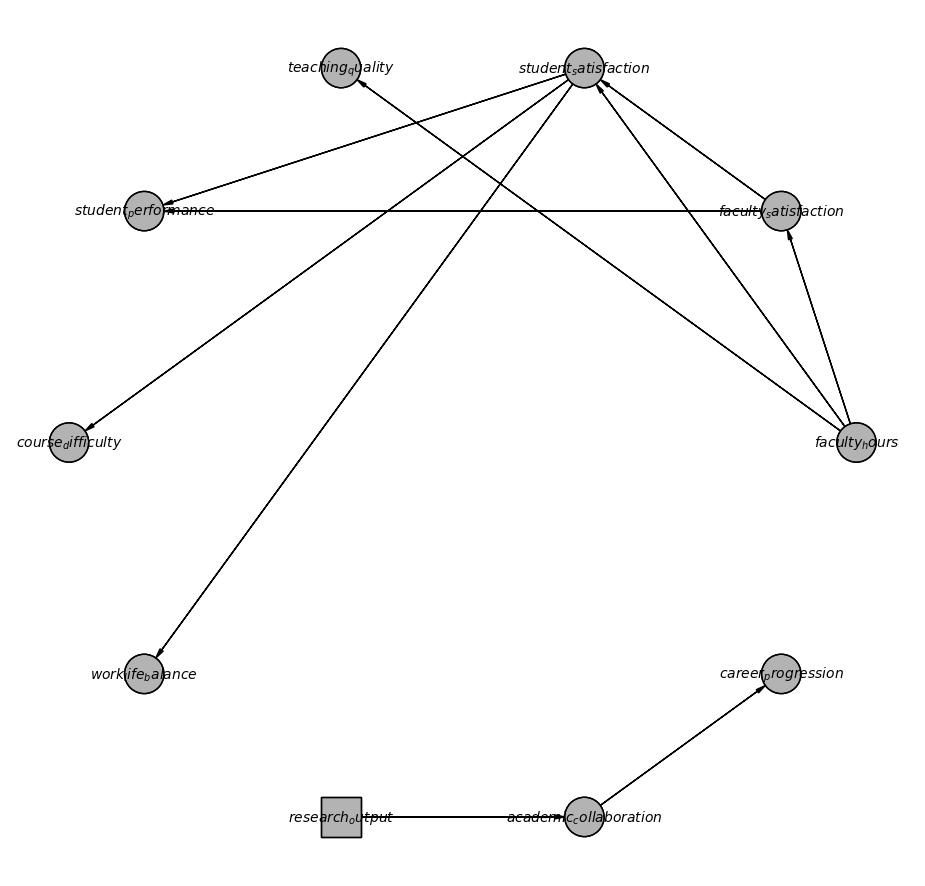

In [95]:
#plt.figure(figsize=(10, 10))
model_daft = digital_twin.to_daft(
                                  pgm_params={'grid_unit': 10},
                                  node_params={'research_output': {'shape': 'rectangle'}})
# To open the plot
model_daft.render()

In [87]:
model_daft.savefig("temp.png")

StopIteration: 

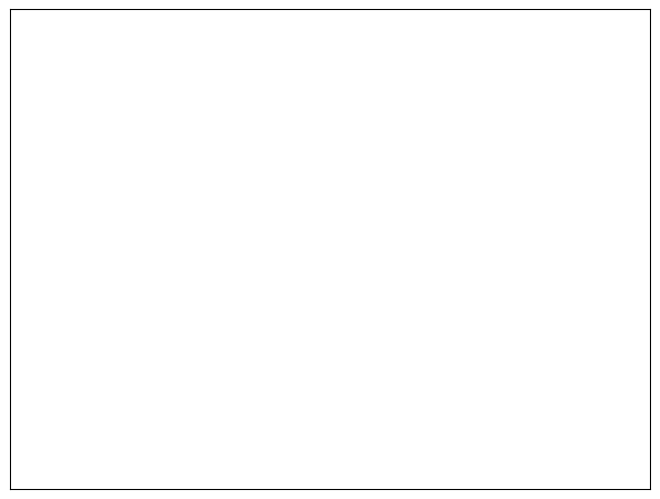

In [83]:
nx.draw(digital_twin)

# based on config

In [110]:
import yaml
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.continuous import ContinuousFactor
from scipy.stats import norm

# Step 1: Read YAML configuration
with open("network_config.yaml", "r") as file:
    config = yaml.safe_load(file)

# Step 2: Initialize Bayesian Network
digital_twin = BayesianNetwork()

# Step 3: Add nodes and structure dynamically
for variable, properties in config['variables'].items():
    digital_twin.add_node(variable)

for variable, properties in config['variables'].items():
    if "conditional_on" in properties:
        parents = [parent.strip() for parent in properties["conditional_on"].split(",")]
        for parent in parents:
            digital_twin.add_edge(parent, variable)

# Step 4: Define PDF functions dynamically
factors = {}
for variable, properties in config['variables'].items():
    if properties['type'] == 'continuous':
        if properties['distribution'] == 'normal':
            mean = properties['parameters']['mean']
            std_dev = properties['parameters']['std_dev']
            factors[variable] = ContinuousFactor(
                variables=[variable],
                pdf=lambda x, mean=mean, std_dev=std_dev: norm.pdf(x, loc=mean, scale=std_dev)
            )
        elif properties['distribution'] == 'conditional':
            # Define a lambda based on the provided equation
            equation = properties['equation']
            std_dev = properties.get('std_dev', 1)
            cond_on = [i.strip() for i in properties['conditional_on'].split(",")]
            factors[variable] = ContinuousFactor(
                variables=[variable] + cond_on,
                pdf=lambda x, **inputs: norm.pdf(x, loc=eval(equation, inputs), scale=std_dev)
            )
    elif properties['type'] == 'discrete':
        # Use a bounded range based on the equation and clip to bounds
        equation = properties['equation']
        bounds = properties['bounds']
        factors[variable] = lambda **inputs: int(np.clip(eval(equation, inputs), bounds[0], bounds[1]))

# Step 5: Add factors to the Bayesian Network
for variable, factor in factors.items():
    digital_twin.add_cpds(factor)

# Step 6: Check if the model is valid
#digital_twin.check_model()

print("Digital twin Bayesian network created successfully with dynamic factors.")

Digital twin Bayesian network created successfully with dynamic factors.


<Axes: >

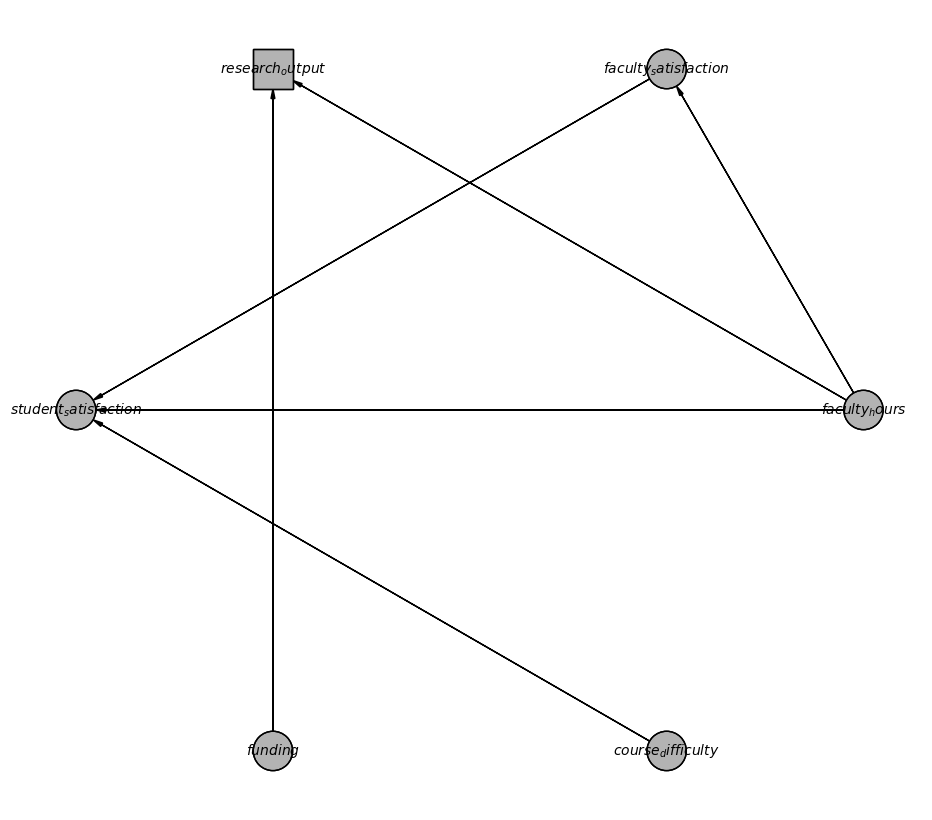

In [112]:
model_daft = digital_twin.to_daft(
                                  pgm_params={'grid_unit': 10},
                                  node_params={'research_output': {'shape': 'rectangle'}})
# To open the plot
model_daft.render()